In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [38]:
# path to file
fn = 'events_LHCO2020_BlackBox3'

In [39]:
# Only load the first couple events for feature exploration
df = pandas.read_hdf('data/' + fn + '.h5',stop=100000)
print(df.shape)
print("Memory in GB:",sum(df.memory_usage(deep=True)) / (1024**3))

(100000, 2100)
Memory in GB: 1.5653669834136963


In [40]:
# Isolate pT, eta, and phi

df_pt = df.iloc[:,::3].to_numpy()
df_eta = df.iloc[:,1::3].to_numpy()
df_phi = df.iloc[:,2::3].to_numpy()

In [41]:
# Compute constitutent cartesian momenta

df_px = df_pt * np.cos(df_phi)
df_py = df_pt * np.sin(df_phi)
df_pz = df_pt * np.sinh(df_eta)

In [42]:
# Compute jet cartesian momenta

j_px = df_px.sum(axis = 1)
j_py = df_py.sum(axis = 1)
j_pz = df_pz.sum(axis = 1)

In [43]:
# Compute jet pT, eta, and phi

j_pt = np.sqrt(j_px ** 2 + j_py ** 2)
j_phi = np.arctan2(j_py, j_px)
j_eta = np.arcsinh(j_pz / j_pt)

In [44]:
def makeplot(main, title, xaxis, r = None):
    main = main.flatten()
    main = main[main != 0]

    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel("Prob. Density (a.u.)")

    plt.hist(main, bins = "auto", range = r, histtype = "step", color = "tab:blue")
    plt.savefig("features/" + fn + "/" + title + ".png", transparent = True)
    plt.show()
    plt.clf()

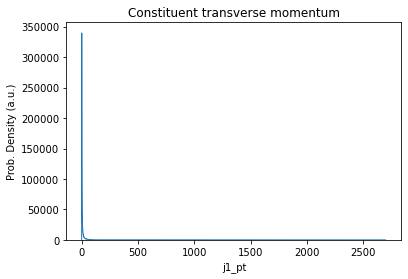

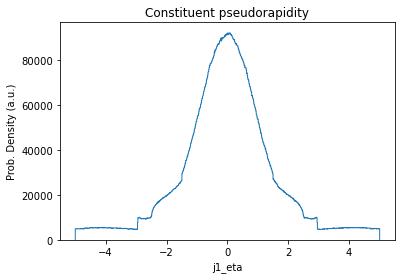

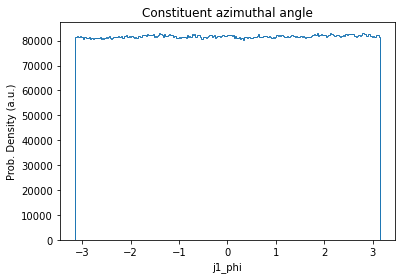

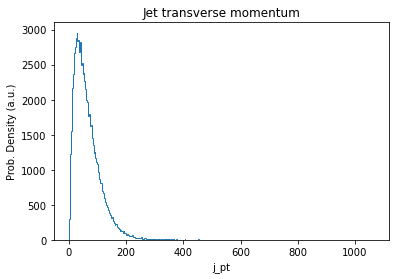

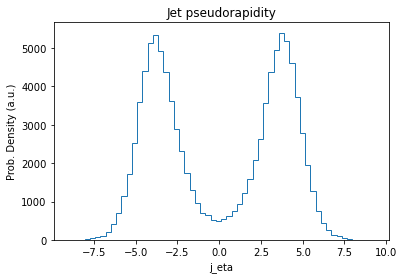

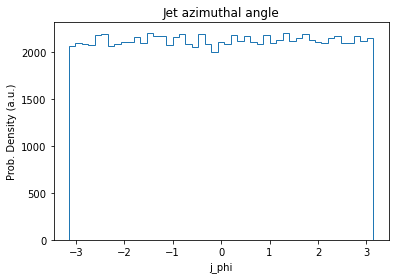

<Figure size 432x288 with 0 Axes>

In [45]:
makeplot(df_pt, "Constituent transverse momentum", "j1_pt")
makeplot(df_eta, "Constituent pseudorapidity", "j1_eta")
makeplot(df_phi, "Constituent azimuthal angle", "j1_phi")

makeplot(j_pt, "Jet transverse momentum", "j_pt")
makeplot(j_eta, "Jet pseudorapidity", "j_eta")
makeplot(j_phi, "Jet azimuthal angle", "j_phi")